Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("darkgrid")

Data Understanding & Initial Exploration:

In [2]:
# Loading the dataset
data = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

In [3]:
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(50410, 8)


In [4]:
print("First 10 Row of dataset")
data.head(10)

First 10 Row of dataset


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
5,5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master
6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
8,8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa
9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa


In [5]:
print("Info about of dataset:")
print(data.info())

Info about of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None


In [6]:
print("Basic statistics for numerical columns:")
numerical_stats = data[["amount", "success", "3D_secured"]].describe()
print(numerical_stats)

Basic statistics for numerical columns:
             amount       success    3D_secured
count  50410.000000  50410.000000  50410.000000
mean     202.395715      0.202896      0.238266
std       96.274730      0.402160      0.426027
min        6.000000      0.000000      0.000000
25%      133.000000      0.000000      0.000000
50%      201.000000      0.000000      0.000000
75%      269.000000      0.000000      0.000000
max      630.000000      1.000000      1.000000


In [7]:
print("Basic statistics for categorical columns:")
categorical_stats = data[["country", "PSP", "card"]].describe(include="object")
print(categorical_stats)

Basic statistics for categorical columns:
        country      PSP    card
count     50410    50410   50410
unique        3        4       3
top     Germany  UK_Card  Master
freq      30233    26459   29002


data Cleaning & Pre-processing:

In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)
print("Dropped the unnecessary first column of the dataset")

Dropped the unnecessary first column of the dataset


In [9]:
print("Processed Data (First 5 Rows)")
data.head(5)

Processed Data (First 5 Rows)


,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [10]:
missing_values_check = data.isnull().sum()
print("Missing Values Check:\n", missing_values_check)

Missing Values Check:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64



Percentage of Transactions Considered Outliers: 0.30351120809363225 %


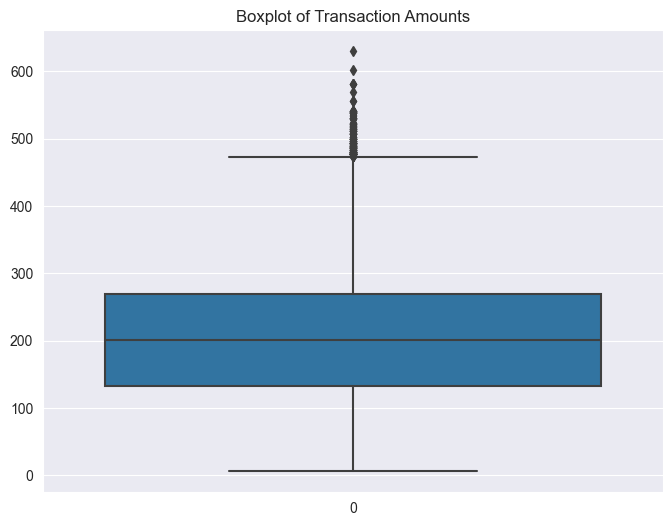

In [11]:
# Address Potential Outliers
# Checking for outliers in the 'amount' column using the IQR method
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
percentage_outliers = len(outliers) / len(data) * 100

print("\nPercentage of Transactions Considered Outliers:", percentage_outliers, "%")

# Identifying potential anomalies for 'amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(data["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

EDA 1:

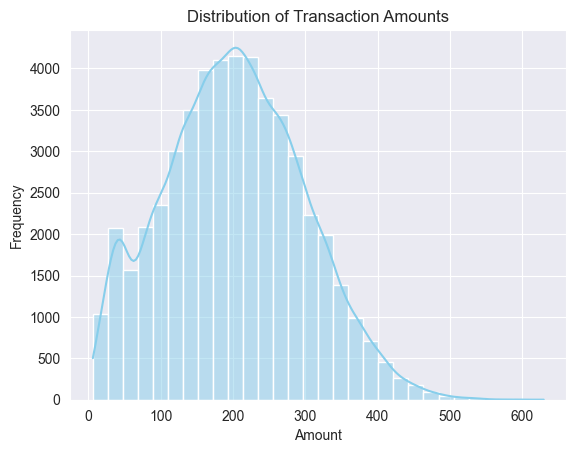

In [12]:
sns.histplot(data["amount"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

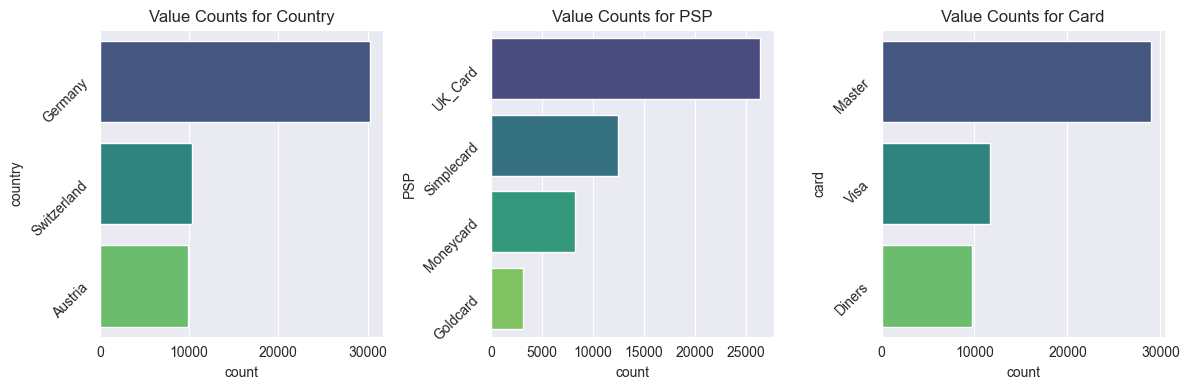

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plotting the 'country' bar chart on the first subplot
sns.countplot(
    data=data,
    y="country",
    order=data["country"].value_counts().index,
    ax=axes[0],
    palette="viridis",
)
axes[0].set_title("Value Counts for Country")
axes[0].tick_params(axis="y", rotation=45)

# Plotting the 'PSP' bar chart on the second subplot
sns.countplot(
    data=data,
    y="PSP",
    order=data["PSP"].value_counts().index,
    ax=axes[1],
    palette="viridis",
)
axes[1].set_title("Value Counts for PSP")
axes[1].tick_params(axis="y", rotation=45)

# Plotting the 'card' bar chart on the third subplot
sns.countplot(
    data=data,
    y="card",
    order=data["card"].value_counts().index,
    ax=axes[2],
    palette="viridis",
)
axes[2].set_title("Value Counts for Card")
axes[2].tick_params(axis="y", rotation=45)

plt.tight_layout()
plt.show()

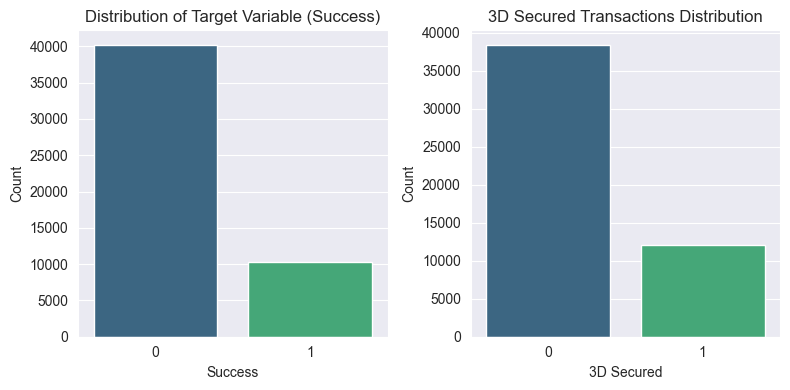

In [14]:
plt.figure(figsize=(8, 4))

# Distribution of Target Variable (Success)
plt.subplot(1, 2, 1)
sns.countplot(x=data["success"], palette="viridis")
plt.title("Distribution of Target Variable (Success)")
plt.xlabel("Success")
plt.ylabel("Count")

# 3D Secured Transactions Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=data["3D_secured"], palette="viridis")
plt.title("3D Secured Transactions Distribution")
plt.xlabel("3D Secured")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

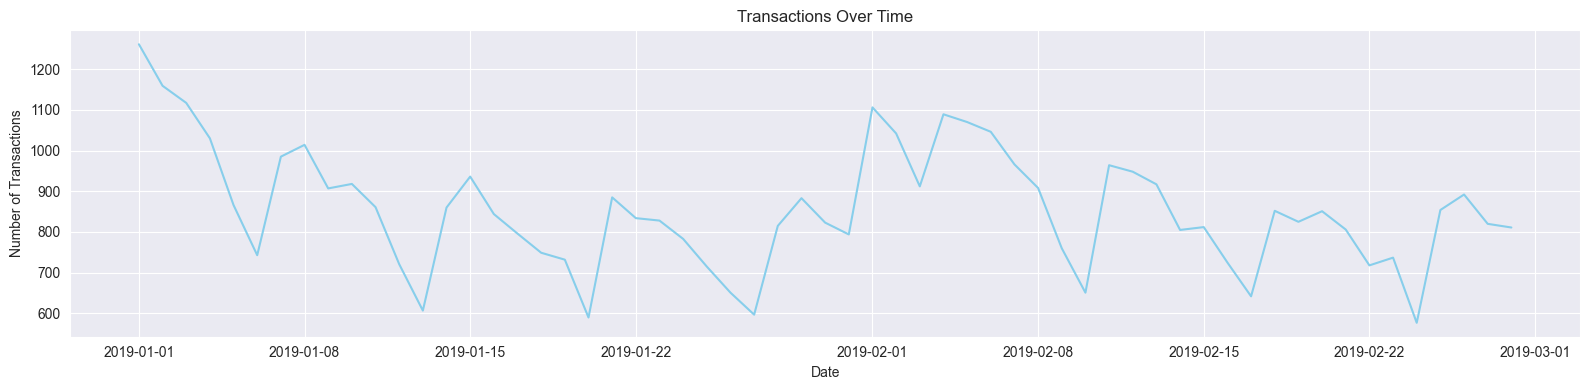

In [15]:
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Group by date and count the number of transactions for each day
daily_transactions = data.groupby(data["tmsp"].dt.date).size()

# Plotting transactions over time
plt.figure(figsize=(16, 4))
daily_transactions.plot(color="skyblue")
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

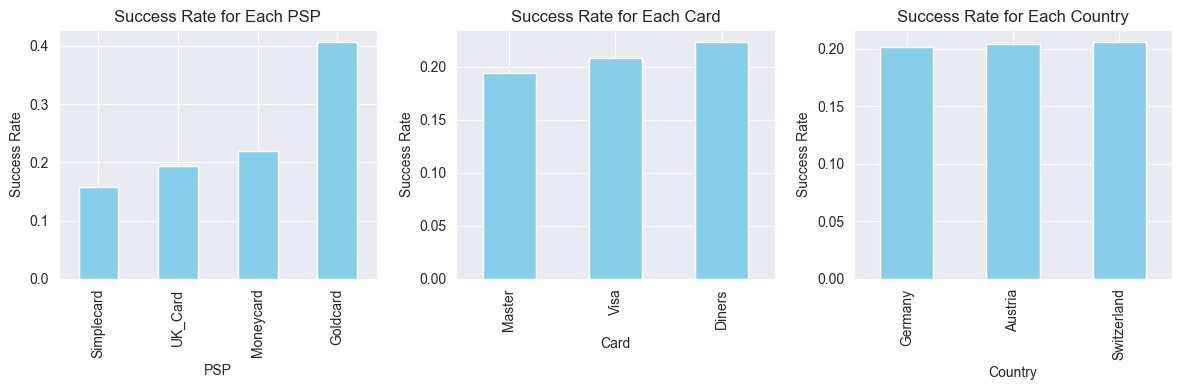

In [16]:
plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Calculate the success rate for each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()
# Plotting the success rate for each PSP
plt.subplot(1, 3, 1)
psp_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each PSP")
plt.xlabel("PSP")
plt.ylabel("Success Rate")

# Calculate the success rate for each card
card_success_rate = data.groupby("card")["success"].mean()
# Plotting the success rate for each card
plt.subplot(1, 3, 2)
card_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each Card")
plt.xlabel("Card")
plt.ylabel("Success Rate")

# Calculate the success rate for each country
country_success_rate = data.groupby("country")["success"].mean()
# Plotting the success rate for each country
plt.subplot(1, 3, 3)
country_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each Country")
plt.xlabel("Country")
plt.ylabel("Success Rate")


plt.tight_layout()
plt.show()


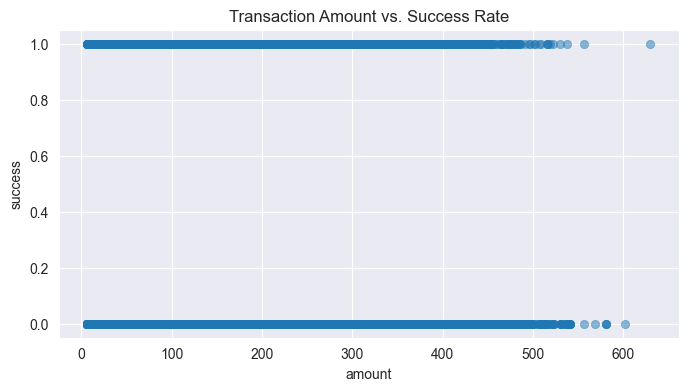

In [17]:
# Transaction Amount vs. Success Rate
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data["amount"], y=data["success"], alpha=0.5, edgecolor=None)
plt.title("Transaction Amount vs. Success Rate")
plt.show()

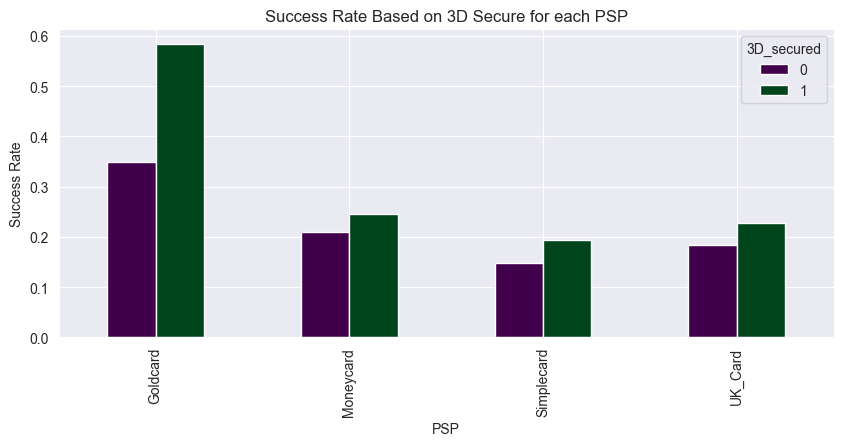

In [18]:
# Success Rate Based on 3D Secure for each PSP
psp_3d_secure_rates = data.groupby(["PSP", "3D_secured"])["success"].mean().unstack()
psp_3d_secure_rates.plot(kind="bar", figsize=(10, 4), colormap="PRGn")
plt.title("Success Rate Based on 3D Secure for each PSP")
plt.ylabel("Success Rate")
plt.show()

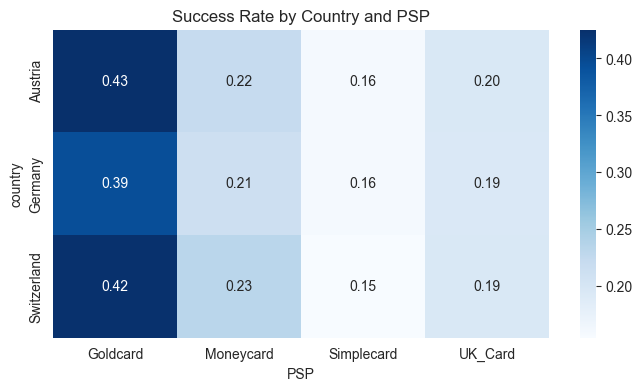

In [19]:
# Country vs. PSP
country_psp_success = data.groupby(["country", "PSP"])["success"].mean().unstack()
plt.figure(figsize=(8, 4))
sns.heatmap(country_psp_success, cmap="Blues", annot=True, fmt=".2f")
plt.title("Success Rate by Country and PSP")
plt.show()

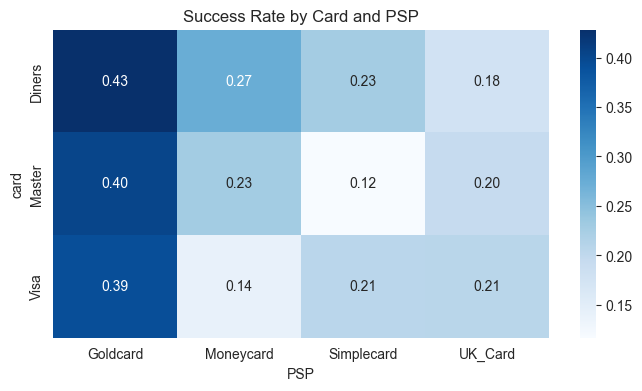

In [20]:
# Card vs. PSP
card_psp_success = data.groupby(["card", "PSP"])["success"].mean().unstack()
plt.figure(figsize=(8, 4))
sns.heatmap(card_psp_success, cmap="Blues", annot=True, fmt=".2f")
plt.title("Success Rate by Card and PSP")
plt.show()

In [21]:
# Fee structure
fees = {
    "Moneycard": {"success": 5, "fail": 2},
    "Goldcard": {"success": 10, "fail": 5},
    "UK_Card": {"success": 3, "fail": 1},
    "Simplecard": {"success": 1, "fail": 0.5},
}

# Transaction Fees Analysis
total_fees = {}
avg_fee_success = {}

for psp, fee in fees.items():
    total_fees[psp] = (
        data[(data["PSP"] == psp) & (data["success"] == 1)].shape[0] * fee["success"]
    ) + (data[(data["PSP"] == psp) & (data["success"] == 0)].shape[0] * fee["fail"])
    avg_fee_success[psp] = (
        total_fees[psp] / data[(data["PSP"] == psp) & (data["success"] == 1)].shape[0]
    )


fees_df = pd.DataFrame(
    {
        "PSP": list(total_fees.keys()),
        "Total Fees (€)": list(total_fees.values()),
        "Average Fee per Successful Transaction (€)": list(avg_fee_success.values()),
    }
)

fees_df.head()

,PSP,Total Fees (€),Average Fee per Successful Transaction (€)
0,Moneycard,22039.0,12.142700
1,Goldcard,22555.0,17.310054
2,UK_Card,36743.0,7.145663
3,Simplecard,7207.0,3.662093


In [22]:
avg_amount_psp = data.groupby("PSP")["amount"].mean().reset_index()
print("Average Transaction Amount by PSP:")
avg_amount_psp

Average Transaction Amount by PSP:


,PSP,amount
0,Goldcard,203.395574
1,Moneycard,201.892853
2,Simplecard,201.356661
3,UK_Card,202.920934


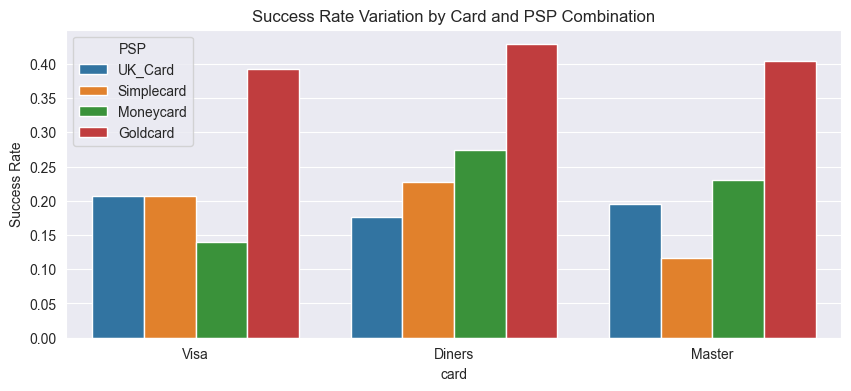

In [23]:
# Success Rate Variation by Card and PSP Combination
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="card", y="success", hue="PSP", errorbar=None)
plt.title("Success Rate Variation by Card and PSP Combination")
plt.ylabel("Success Rate")
plt.show()

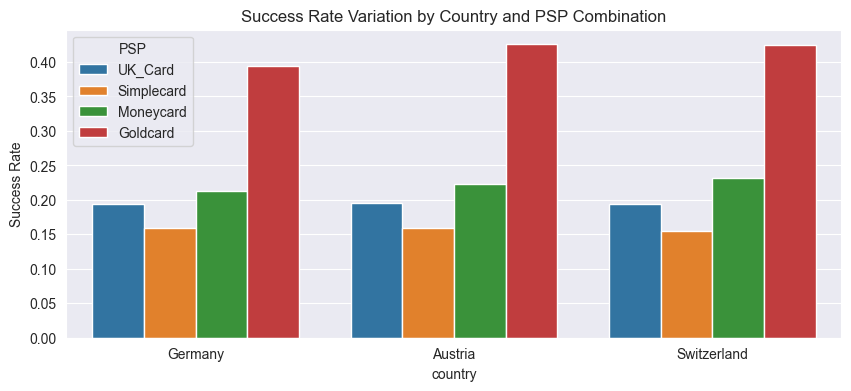

In [24]:
# Success Rate Variation by Country and PSP Combination
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="country", y="success", hue="PSP", errorbar=None)
plt.title("Success Rate Variation by Country and PSP Combination")
plt.ylabel("Success Rate")
plt.show()

In [25]:
# Aggregate Metrics by PSP
agg_metrics_psp = (
    data.groupby("PSP")
    .agg(
        total_transactions=("success", "size"),
        total_value=("amount", "sum"),
        successful_transactions=("success", "sum"),
        failed_transactions=("success", lambda x: len(x) - x.sum()),
    )
    .reset_index()
)
print("Aggregate Metrics by PSP:")
agg_metrics_psp

Aggregate Metrics by PSP:


,PSP,total_transactions,total_value,successful_transactions,failed_transactions
0,Goldcard,3208,652493,1303,1905
1,Moneycard,8297,1675105,1815,6482
2,Simplecard,12446,2506085,1968,10478
3,UK_Card,26459,5369085,5142,21317


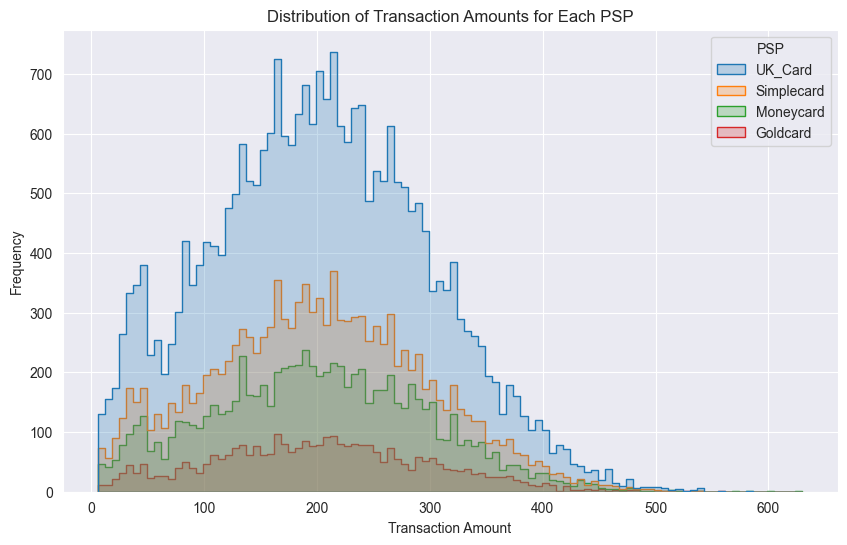

In [26]:
# Distribution of Transaction Amounts for each PSP
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data, x="amount", hue="PSP", bins=100, element="step", common_norm=False
)
plt.title("Distribution of Transaction Amounts for Each PSP")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Feature Engineering 1:

In [27]:
# Convert 'tmsp' column to datetime format
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Extract hour, day, and day of the week from 'tmsp' column
data["hour"] = data["tmsp"].dt.hour
data["day"] = data["tmsp"].dt.day
data["day_of_week"] = data["tmsp"].dt.dayofweek  # Monday=0, Sunday=6
bins = [0, 6, 12, 18, 24]
labels = ["Night", "Morning", "Afternoon", "Evening"]
data["time_of_day"] = pd.cut(data["hour"], bins=bins, labels=labels, right=False)


In [28]:
# 1. Calculate the historical success rate of each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()
data["psp_success_rate"] = data["PSP"].map(psp_success_rate)

# 2. Calculate the success rate of transactions by card type
card_success_rate = data.groupby("card")["success"].mean()
data["card_success_rate"] = data["card"].map(card_success_rate)

# 3. Calculate the success rate of transactions that are 3D secured versus those that are not
secured_success_rate = data.groupby("3D_secured")["success"].mean()
data["secured_success_rate"] = data["3D_secured"].map(secured_success_rate)


In [29]:
# First, determine the quantiles of the 'amount' to decide on the bin edges
quantiles = data["amount"].quantile([0.25, 0.5, 0.75])

# Binning the 'amount' column based on the quantiles
bin_edges = [0] + list(quantiles) + [data["amount"].max() + 1]
bin_labels = ["Low", "Medium", "High", "Very-High"]
data["amount_bin"] = pd.cut(
    data["amount"], bins=bin_edges, labels=bin_labels, right=False
)


In [30]:
# Create an interaction feature between 'country' and 'PSP'
data["country_PSP_interaction"] = data["country"] + "_" + data["PSP"]

# Create an interaction feature between 'card' and 'PSP'
data["card_PSP_interaction"] = data["card"] + "_" + data["PSP"]


In [31]:
# Sort the data by 'country', 'amount', and 'tmsp' to align potential repeated attempts sequentially
data = data.sort_values(by=["country", "amount", "tmsp"])

# Create a column 'time_diff' to calculate the time difference between consecutive transactions
data["time_diff"] = (
    data.groupby(["country", "amount"])["tmsp"].diff().dt.total_seconds()
)

# Binary feature to indicate if a transaction is a repeated attempt (within 60 seconds)
data["multiple_attempts"] = (data["time_diff"] <= 60).astype(int)

# Calculate retry count
data["retry_count"] = data.groupby(["country", "amount"])["multiple_attempts"].cumsum()

# Sort the data by 'tmsp'
data = data.sort_values(by="tmsp")

In [32]:
data.head()


,tmsp,country,amount,success,PSP,3D_secured,card,hour,day,day_of_week,time_of_day,psp_success_rate,card_success_rate,secured_success_rate,amount_bin,country_PSP_interaction,card_PSP_interaction,time_diff,multiple_attempts,retry_count
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0,1,1,Night,0.194338,0.208505,0.189562,Low,Germany_UK_Card,Visa_UK_Card,NaN,0,0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,0,1,1,Night,0.194338,0.208505,0.189562,Low,Germany_UK_Card,Visa_UK_Card,6.0,1,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0,1,1,Night,0.194338,0.222973,0.245525,High,Germany_UK_Card,Diners_UK_Card,NaN,0,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,0,1,1,Night,0.194338,0.222973,0.245525,High,Germany_UK_Card,Diners_UK_Card,24.0,1,1
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0,1,1,Night,0.158123,0.222973,0.189562,Low,Austria_Simplecard,Diners_Simplecard,NaN,0,0


EDA 2:

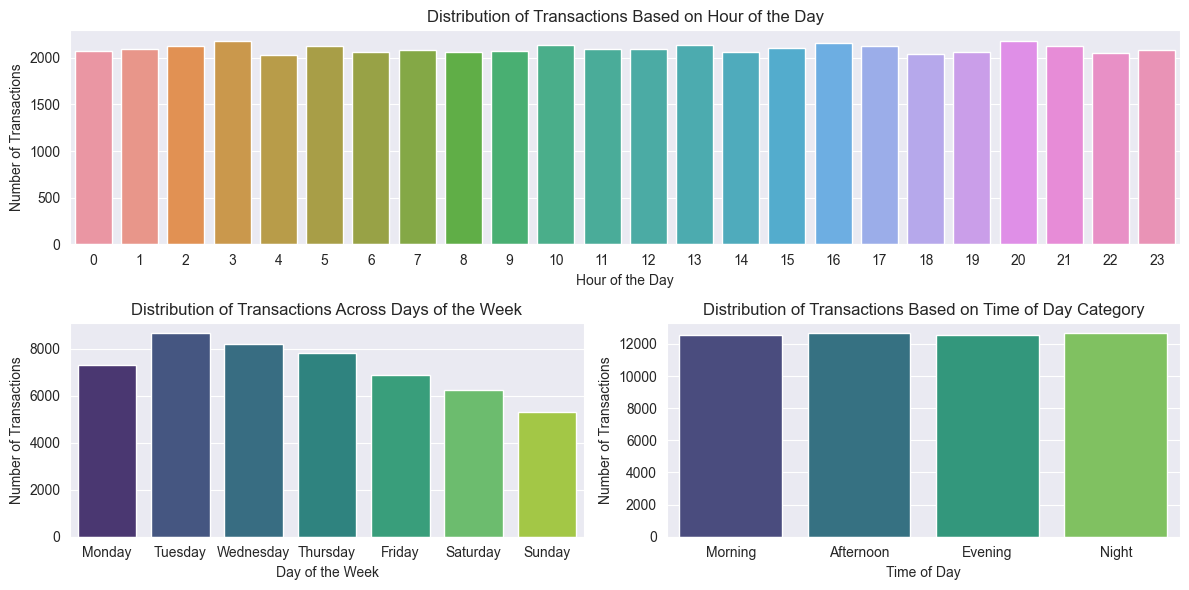

In [33]:
# Initialize the figure
plt.figure(figsize=(12, 6))

# Distribution of transactions based on the hour of the day
plt.subplot(2, 1, 1)
sns.countplot(data=data, x="hour")
plt.title("Distribution of Transactions Based on Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")

# Distribution of transactions across different day_of_week
plt.subplot(2, 2, 3)
sns.countplot(data=data, x="day_of_week", palette="viridis")
plt.title("Distribution of Transactions Across Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.xticks(
    ticks=range(7),
    labels=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

# Distribution of transactions based on the time_of_day category
plt.subplot(2, 2, 4)
sns.countplot(
    data=data,
    x="time_of_day",
    palette="viridis",
    order=["Morning", "Afternoon", "Evening", "Night"],
)
plt.title("Distribution of Transactions Based on Time of Day Category")
plt.xlabel("Time of Day")
plt.ylabel("Number of Transactions")

plt.tight_layout()
plt.show()


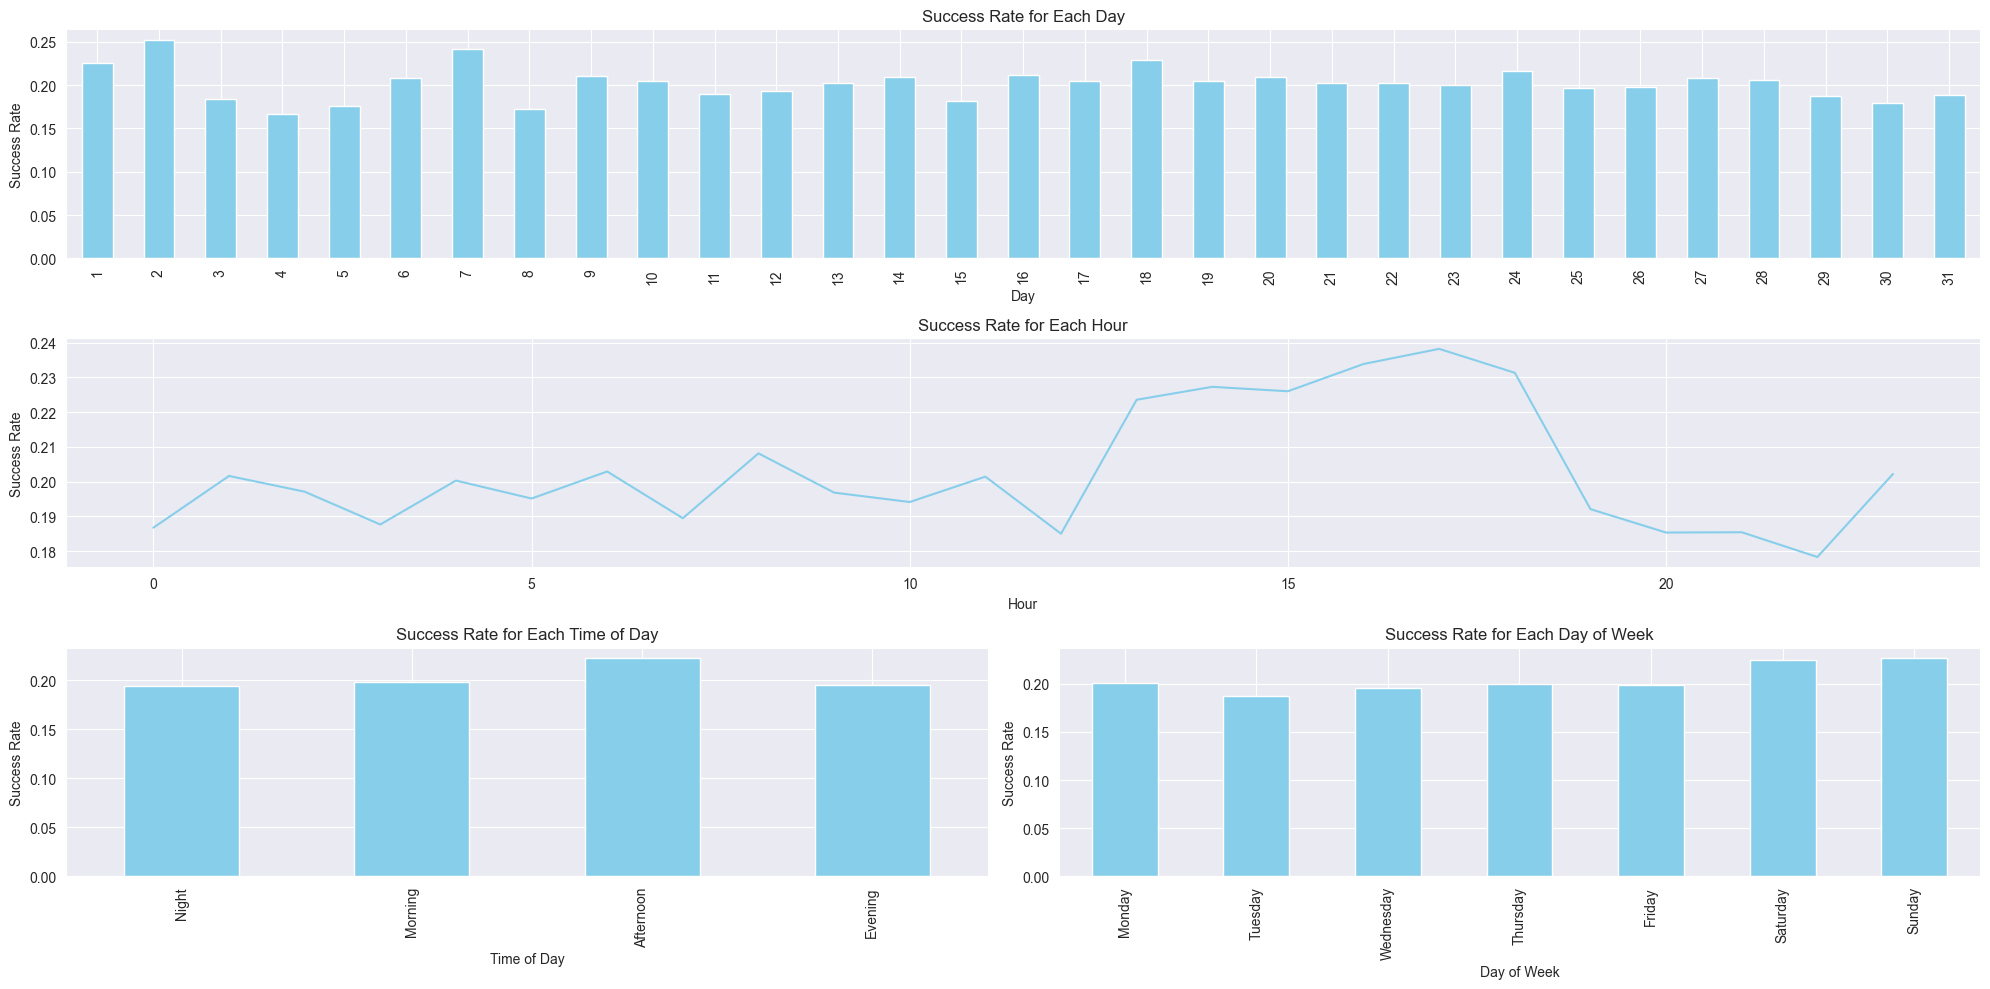

In [34]:
# Create the figure and the grid for subplots
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(3, 2)

# Plotting the success rate for each day
day_success_rate = data.groupby("day")["success"].mean()
ax1 = fig.add_subplot(gs[0, :])
day_success_rate.plot(kind="bar", color="skyblue", ax=ax1)
ax1.set_title("Success Rate for Each Day")
ax1.set_xlabel("Day")
ax1.set_ylabel("Success Rate")

# Plotting the success rate for each hour
hour_success_rate = data.groupby("hour")["success"].mean()
ax2 = fig.add_subplot(gs[1, :])
hour_success_rate.plot(kind="line", color="skyblue", ax=ax2)
ax2.set_title("Success Rate for Each Hour")
ax2.set_xlabel("Hour")
ax2.set_ylabel("Success Rate")

# Plotting the success rate for each time_of_day
time_of_day_success_rate = data.groupby("time_of_day")["success"].mean()
ax3 = fig.add_subplot(gs[2, 0])
time_of_day_success_rate.plot(kind="bar", color="skyblue", ax=ax3)
ax3.set_title("Success Rate for Each Time of Day")
ax3.set_xlabel("Time of Day")
ax3.set_ylabel("Success Rate")

# Plotting the success rate for each day_of_week
day_of_week_success_rate = data.groupby("day_of_week")["success"].mean()
ax4 = fig.add_subplot(gs[2, 1])
day_of_week_success_rate.plot(kind="bar", color="skyblue", ax=ax4)
ax4.set_title("Success Rate for Each Day of Week")
ax4.set_xlabel("Day of Week")
ax4.set_ylabel("Success Rate")
ax4.set_xticks = range(7)
ax4.set_xticklabels(
    [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
)


plt.tight_layout()
plt.show()

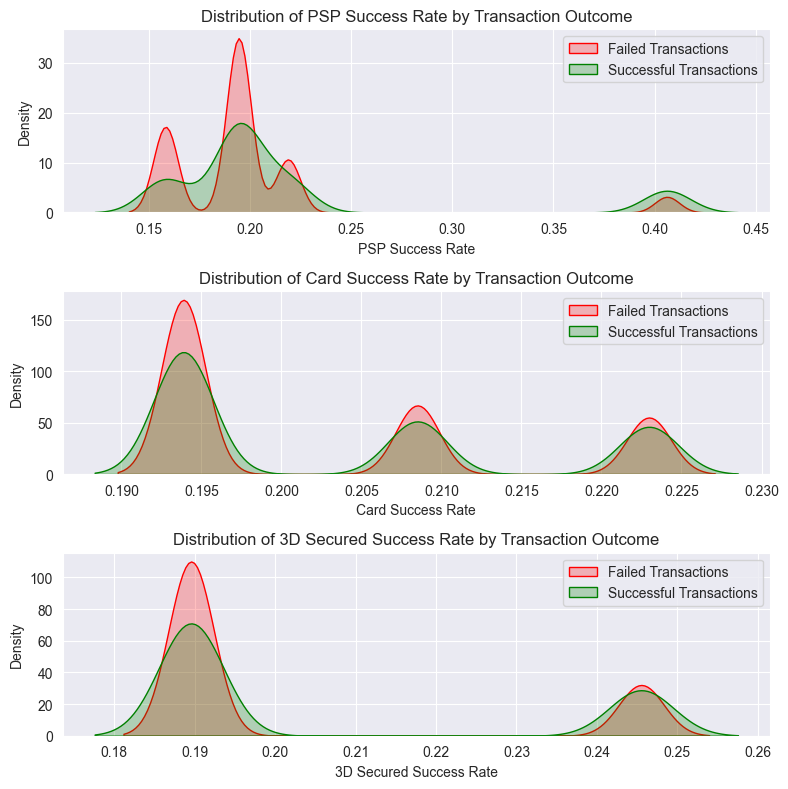

In [35]:
# Initialize the figure
plt.figure(figsize=(8, 8))

# 1. Distribution of psp_success_rate and its relation with the target variable (success)
plt.subplot(3, 1, 1)
sns.kdeplot(
    data=data[data["success"] == 0]["psp_success_rate"],
    label="Failed Transactions",
    fill=True,
    color="red",
)
sns.kdeplot(
    data=data[data["success"] == 1]["psp_success_rate"],
    label="Successful Transactions",
    fill=True,
    color="green",
)
plt.title("Distribution of PSP Success Rate by Transaction Outcome")
plt.xlabel("PSP Success Rate")
plt.ylabel("Density")
plt.legend()

# 2. Distribution of card_success_rate and its correlation with success
plt.subplot(3, 1, 2)
sns.kdeplot(
    data=data[data["success"] == 0]["card_success_rate"],
    label="Failed Transactions",
    fill=True,
    color="red",
)
sns.kdeplot(
    data=data[data["success"] == 1]["card_success_rate"],
    label="Successful Transactions",
    fill=True,
    color="green",
)
plt.title("Distribution of Card Success Rate by Transaction Outcome")
plt.xlabel("Card Success Rate")
plt.ylabel("Density")
plt.legend()

# 3. Distribution of secured_success_rate and its impact on success
plt.subplot(3, 1, 3)
sns.kdeplot(
    data=data[data["success"] == 0]["secured_success_rate"],
    label="Failed Transactions",
    fill=True,
    color="red",
)
sns.kdeplot(
    data=data[data["success"] == 1]["secured_success_rate"],
    label="Successful Transactions",
    fill=True,
    color="green",
)
plt.title("Distribution of 3D Secured Success Rate by Transaction Outcome")
plt.xlabel("3D Secured Success Rate")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


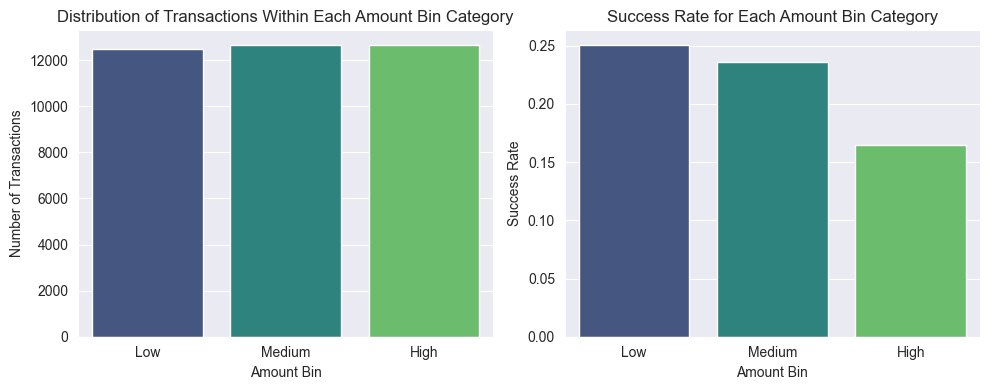

In [36]:
# Initialize the figure
plt.figure(figsize=(10, 4))

# 1. Distribution of transactions within each amount_bin category
plt.subplot(1, 2, 1)
sns.countplot(
    data=data, x="amount_bin", palette="viridis", order=["Low", "Medium", "High"]
)
plt.title("Distribution of Transactions Within Each Amount Bin Category")
plt.xlabel("Amount Bin")
plt.ylabel("Number of Transactions")

# 2. Success rate for each amount_bin category
plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    x="amount_bin",
    y="success",
    palette="viridis",
    order=["Low", "Medium", "High"],
    errorbar=None,
)
plt.title("Success Rate for Each Amount Bin Category")
plt.xlabel("Amount Bin")
plt.ylabel("Success Rate")

plt.tight_layout()
plt.show()


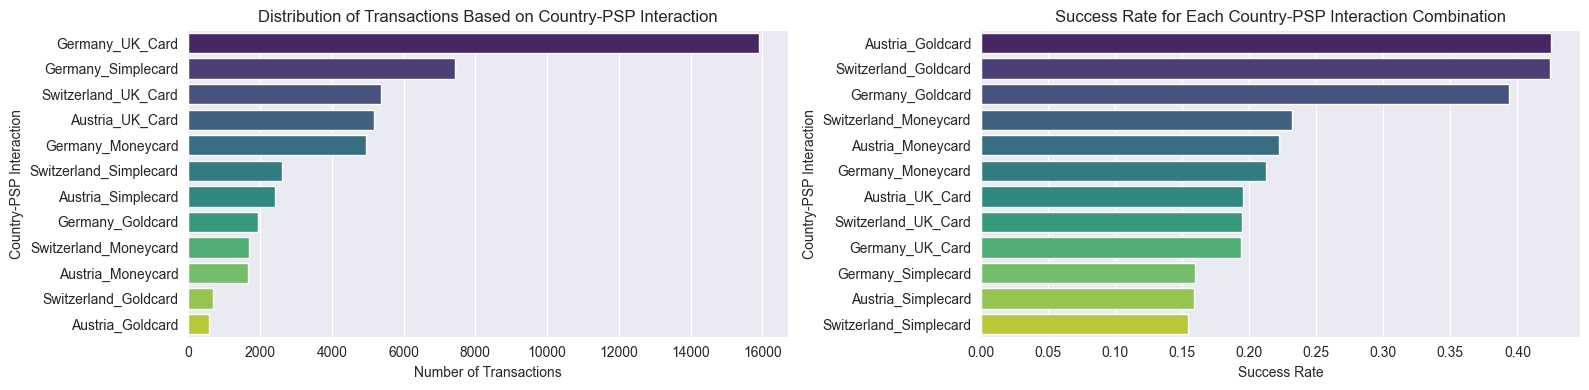

In [37]:
# Initialize the figure
plt.figure(figsize=(16, 4))

# Distribution of transactions based on country_PSP_interaction
plt.subplot(1, 2, 1)
sns.countplot(
    data=data,
    y="country_PSP_interaction",
    palette="viridis",
    order=data["country_PSP_interaction"].value_counts().index,
)
plt.title("Distribution of Transactions Based on Country-PSP Interaction")
plt.xlabel("Number of Transactions")
plt.ylabel("Country-PSP Interaction")

# Success rate for each country_PSP_interaction combination
plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    y="country_PSP_interaction",
    x="success",
    palette="viridis",
    errorbar=None,
    order=data.groupby("country_PSP_interaction")["success"]
    .mean()
    .sort_values(ascending=False)
    .index,
)
plt.title("Success Rate for Each Country-PSP Interaction Combination")
plt.xlabel("Success Rate")
plt.ylabel("Country-PSP Interaction")

plt.tight_layout()
plt.show()


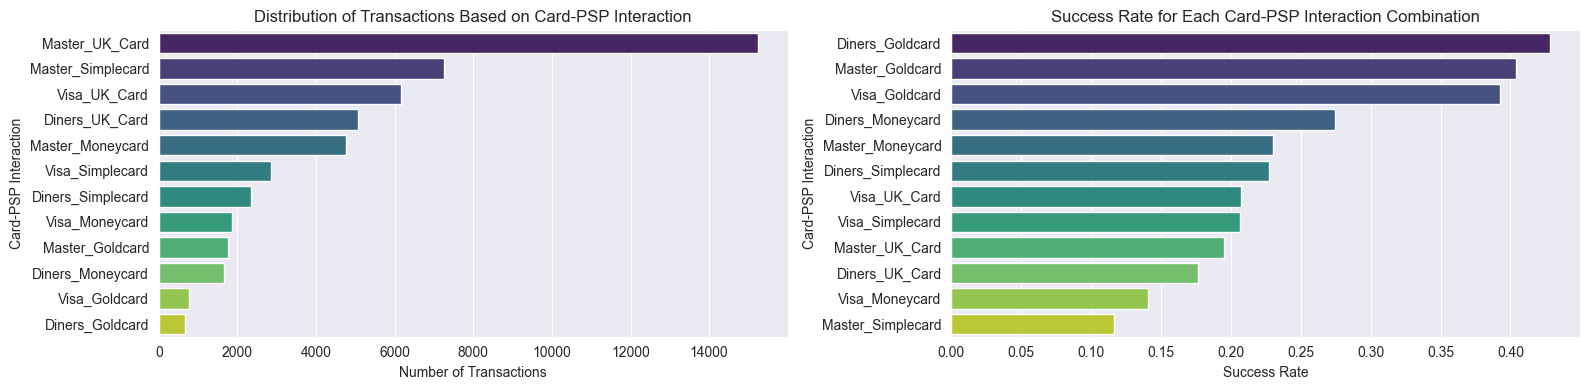

In [38]:
# Initialize the figure
plt.figure(figsize=(16, 4))

# Distribution of transactions based on card_PSP_interaction
plt.subplot(1, 2, 1)
sns.countplot(
    data=data,
    y="card_PSP_interaction",
    palette="viridis",
    order=data["card_PSP_interaction"].value_counts().index,
)
plt.title("Distribution of Transactions Based on Card-PSP Interaction")
plt.xlabel("Number of Transactions")
plt.ylabel("Card-PSP Interaction")

# Success rate for each card_PSP_interaction combination
plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    y="card_PSP_interaction",
    x="success",
    palette="viridis",
    errorbar=None,
    order=data.groupby("card_PSP_interaction")["success"]
    .mean()
    .sort_values(ascending=False)
    .index,
)
plt.title("Success Rate for Each Card-PSP Interaction Combination")
plt.xlabel("Success Rate")
plt.ylabel("Card-PSP Interaction")

plt.tight_layout()
plt.show()


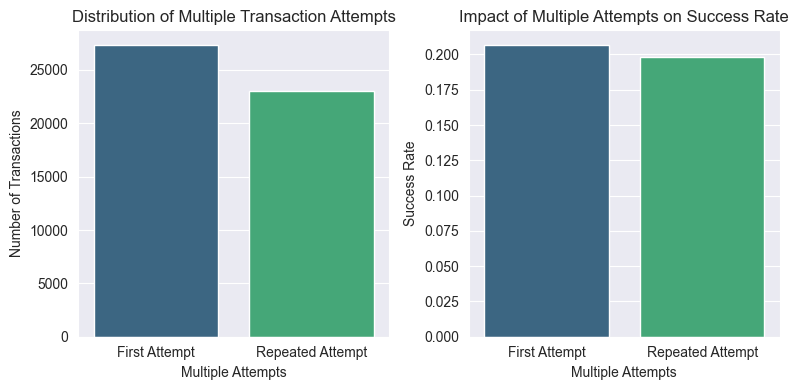

In [39]:
# Initialize the figure
plt.figure(figsize=(8, 4))

# 1. Distribution of multiple_attempts to observe how often repeated transaction attempts occur
plt.subplot(1, 2, 1)
sns.countplot(data=data, x="multiple_attempts", palette="viridis")
plt.title("Distribution of Multiple Transaction Attempts")
plt.xlabel("Multiple Attempts")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=[0, 1], labels=["First Attempt", "Repeated Attempt"])

# 2. Impact of multiple_attempts on the success rate
plt.subplot(1, 2, 2)
sns.barplot(
    data=data, x="multiple_attempts", y="success", palette="viridis", errorbar=None
)
plt.title("Impact of Multiple Attempts on Success Rate")
plt.xlabel("Multiple Attempts")
plt.ylabel("Success Rate")
plt.xticks(ticks=[0, 1], labels=["First Attempt", "Repeated Attempt"])


plt.tight_layout()
plt.show()


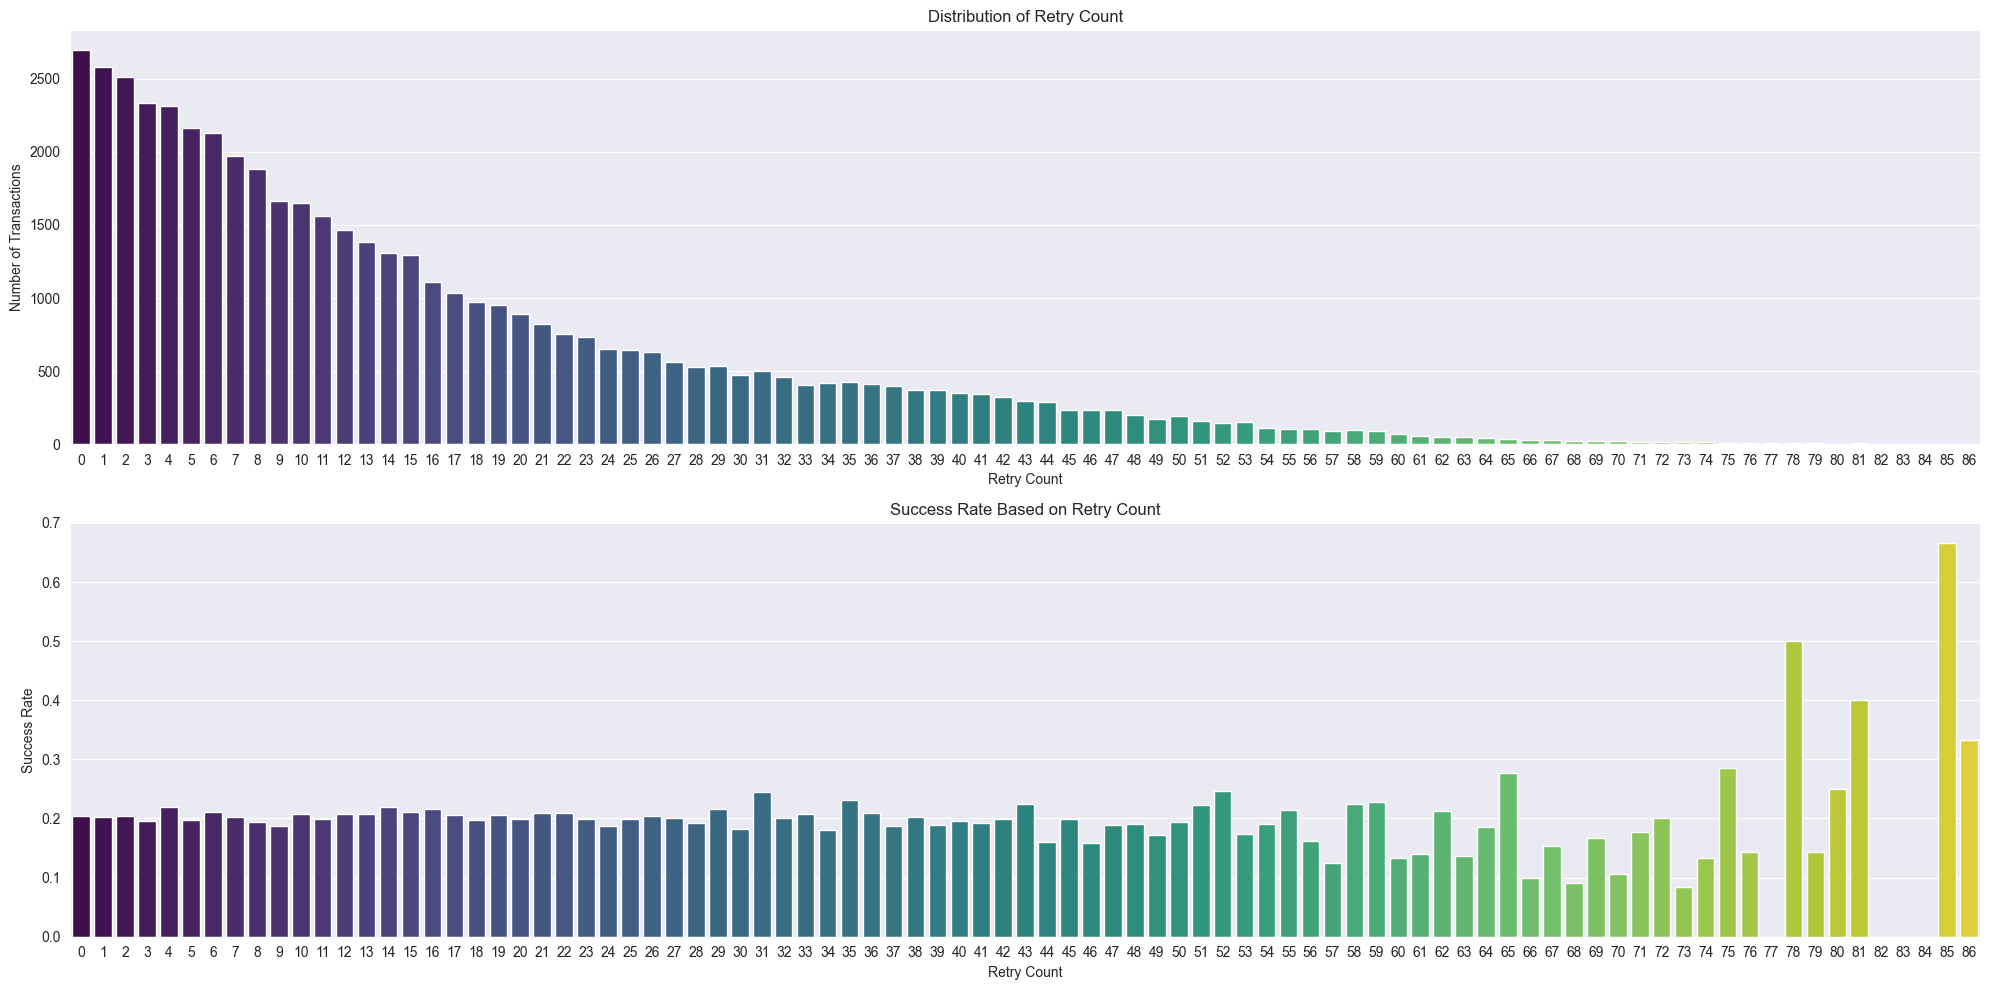

In [40]:
# Initialize the figure
plt.figure(figsize=(20, 10))


# Distribution of retry_count to understand how many times customers typically retry
plt.subplot(2, 1, 1)
sns.countplot(data=data, x="retry_count", palette="viridis")
plt.title("Distribution of Retry Count")
plt.xlabel("Retry Count")
plt.ylabel("Number of Transactions")

# Success rate based on retry_count
plt.subplot(2, 1, 2)
sns.barplot(data=data, x="retry_count", y="success", palette="viridis", errorbar=None)
plt.title("Success Rate Based on Retry Count")
plt.xlabel("Retry Count")
plt.ylabel("Success Rate")

plt.tight_layout()
plt.show()


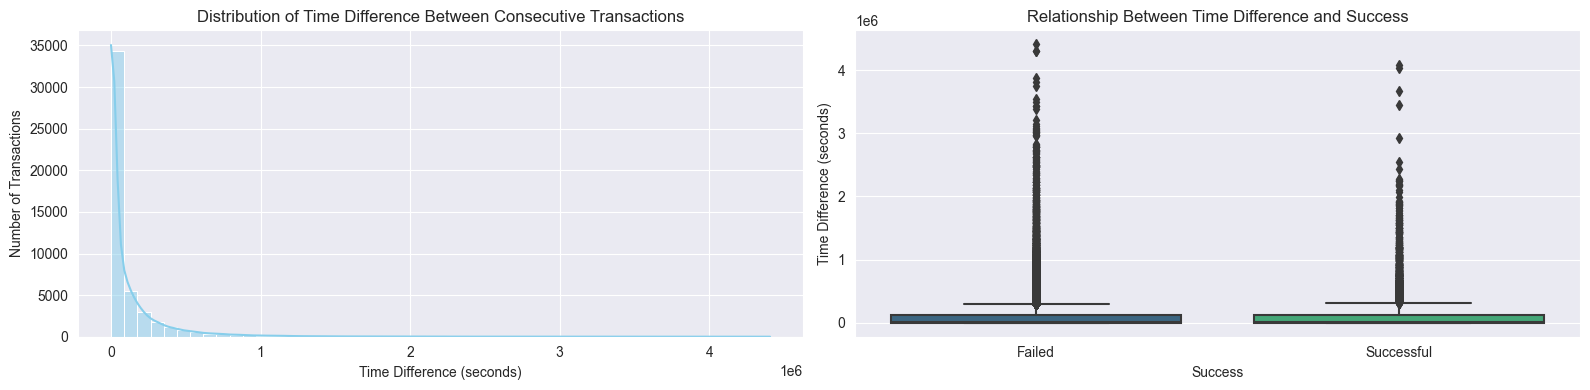

In [41]:
# Initialize the figure
plt.figure(figsize=(16, 4))

# 1. Distribution of time_diff between consecutive transactions
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="time_diff", bins=50, kde=True, color="skyblue")
plt.title("Distribution of Time Difference Between Consecutive Transactions")
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Number of Transactions")

# 2. Relationship between time_diff and success
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x="success", y="time_diff", palette="viridis")
plt.title("Relationship Between Time Difference and Success")
plt.xlabel("Success")
plt.ylabel("Time Difference (seconds)")
plt.xticks(ticks=[0, 1], labels=["Failed", "Successful"])

plt.tight_layout()
plt.show()


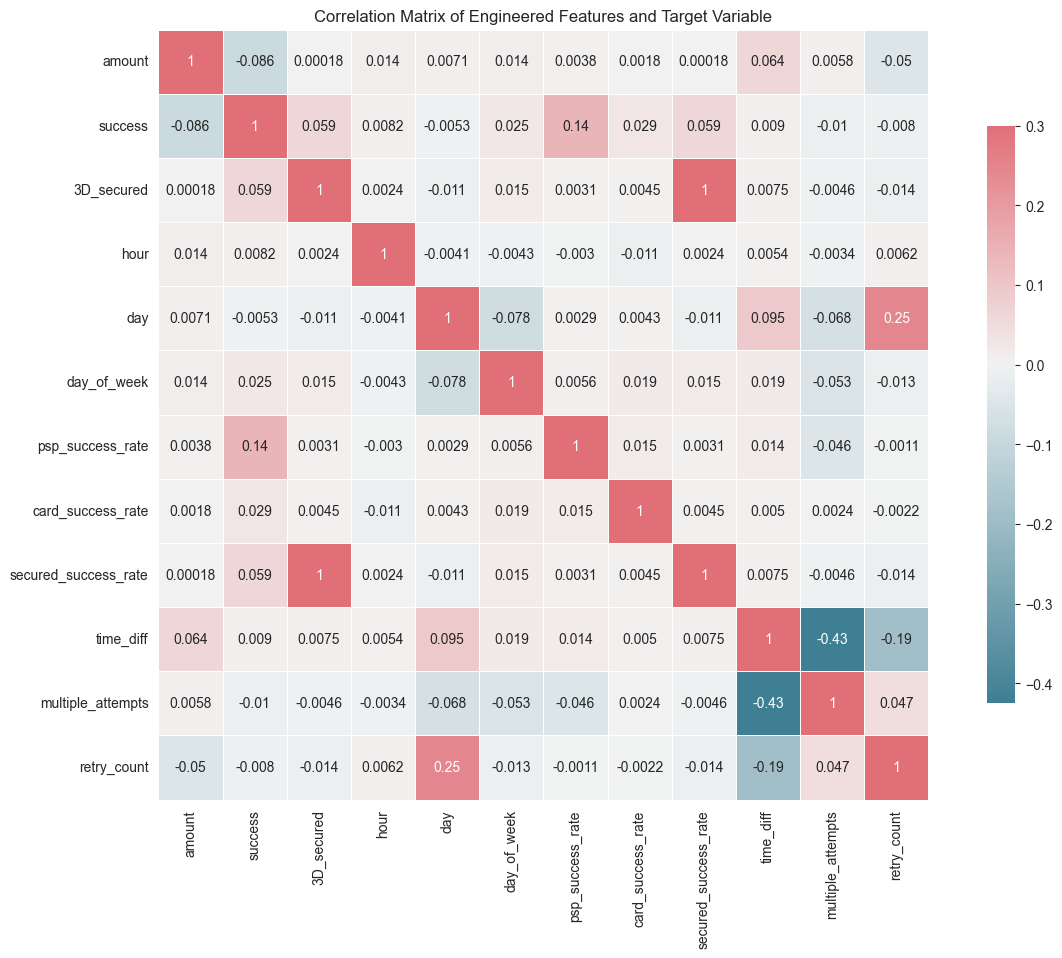

In [42]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    cbar_kws={"shrink": 0.75},
)

plt.title("Correlation Matrix of Engineered Features and Target Variable")
plt.show()


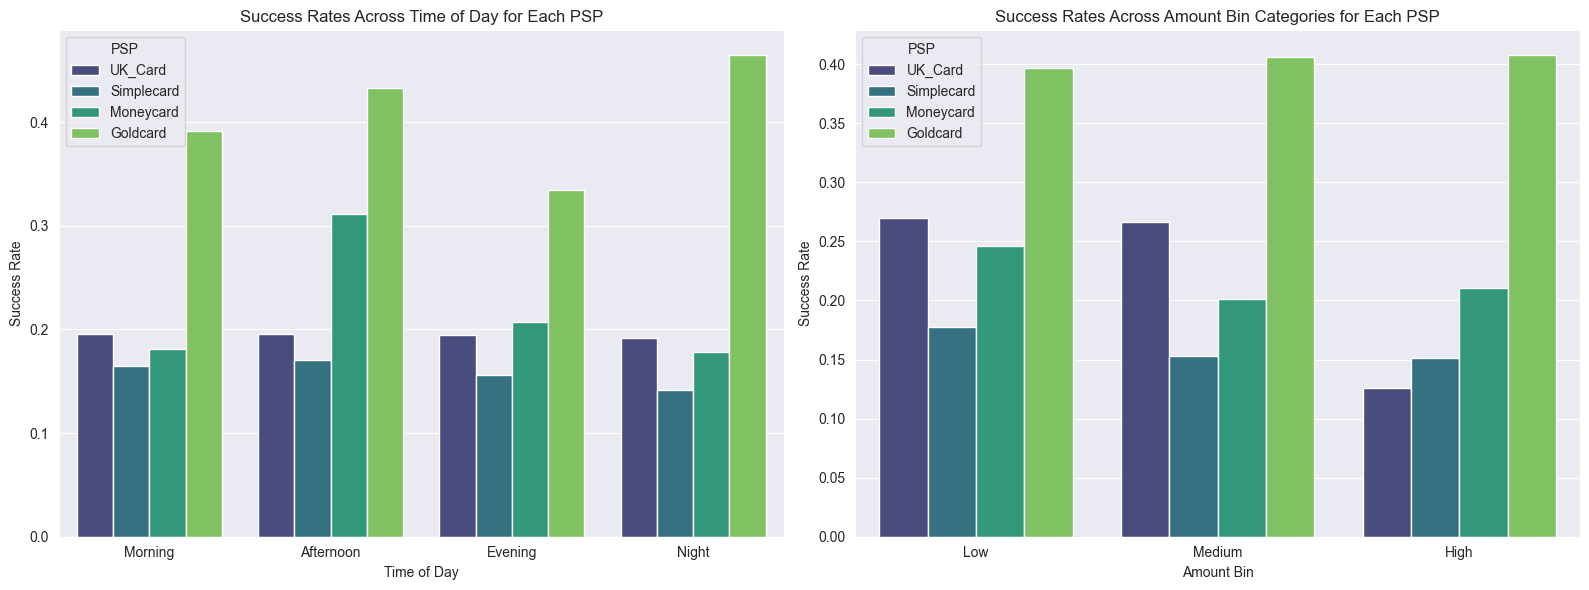

In [43]:
# Initialize the figure
plt.figure(figsize=(16, 6))

# 1. Compare success rates across different time_of_day for each PSP
plt.subplot(1, 2, 1)
sns.barplot(
    data=data,
    x="time_of_day",
    y="success",
    hue="PSP",
    palette="viridis",
    errorbar=None,
    order=["Morning", "Afternoon", "Evening", "Night"],
)
plt.title("Success Rates Across Time of Day for Each PSP")
plt.xlabel("Time of Day")
plt.ylabel("Success Rate")
plt.legend(title="PSP")

# 2. Compare success rates across different amount_bin categories for each PSP
plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    x="amount_bin",
    y="success",
    hue="PSP",
    palette="viridis",
    errorbar=None,
    order=["Low", "Medium", "High"],
)
plt.title("Success Rates Across Amount Bin Categories for Each PSP")
plt.xlabel("Amount Bin")
plt.ylabel("Success Rate")
plt.legend(title="PSP")

plt.tight_layout()
plt.show()


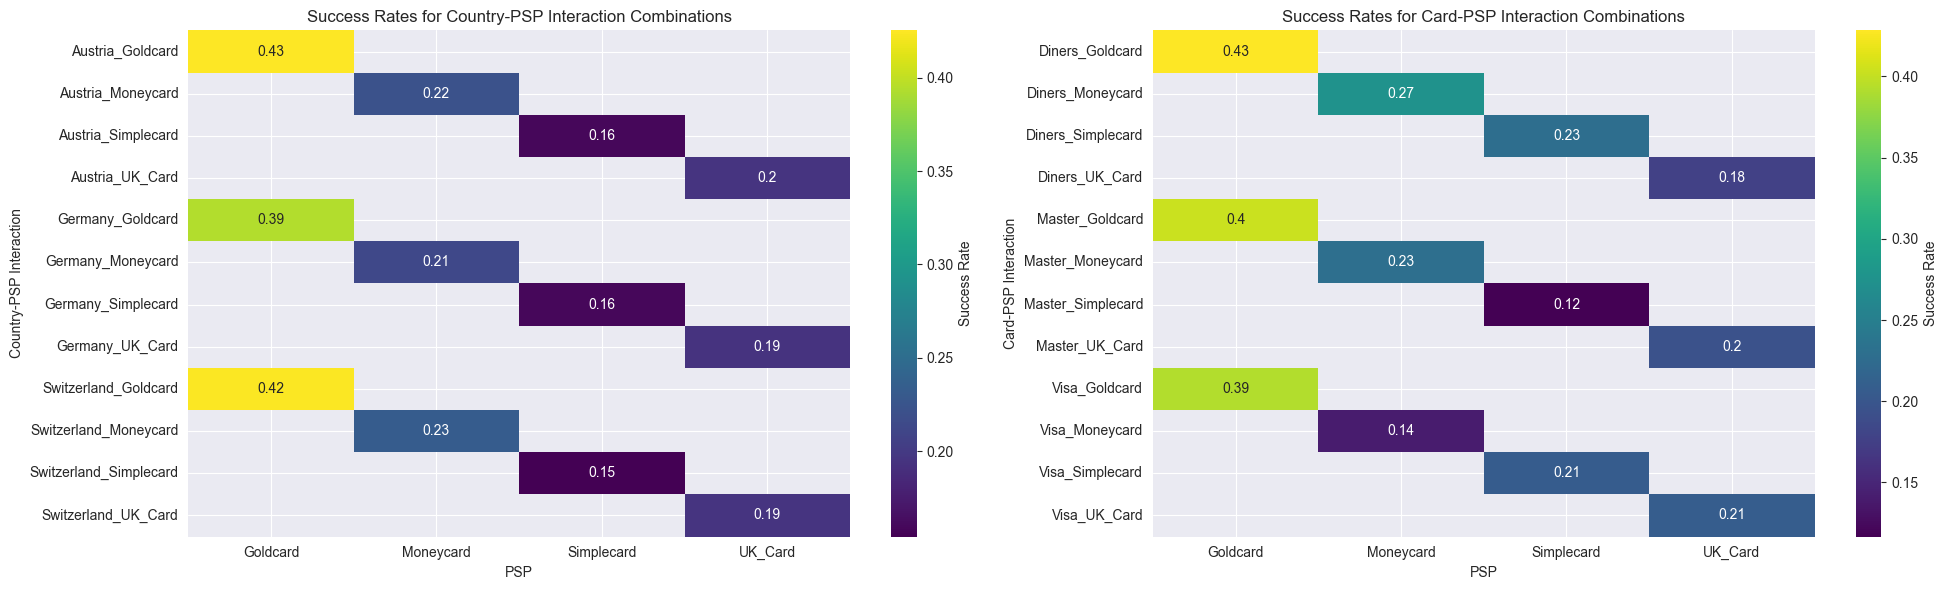

In [44]:
# Pivoting data for heatmaps

country_psp_pivot = (
    data.groupby(["country_PSP_interaction", "PSP"])["success"]
    .mean()
    .reset_index()
    .pivot(index="country_PSP_interaction", columns="PSP", values="success")
)
card_psp_pivot = (
    data.groupby(["card_PSP_interaction", "PSP"])["success"]
    .mean()
    .reset_index()
    .pivot(index="card_PSP_interaction", columns="PSP", values="success")
)


# Initialize the figure
plt.figure(figsize=(20, 6))

# 1. Heatmap for success rates of country_PSP_interaction combinations
plt.subplot(1, 2, 1)
sns.heatmap(
    country_psp_pivot, cmap="viridis", annot=True, cbar_kws={"label": "Success Rate"}
)
plt.title("Success Rates for Country-PSP Interaction Combinations")
plt.xlabel("PSP")
plt.ylabel("Country-PSP Interaction")

# 2. Heatmap for success rates of card_PSP_interaction combinations
plt.subplot(1, 2, 2)
sns.heatmap(
    card_psp_pivot, cmap="viridis", annot=True, cbar_kws={"label": "Success Rate"}
)
plt.title("Success Rates for Card-PSP Interaction Combinations")
plt.xlabel("PSP")
plt.ylabel("Card-PSP Interaction")

plt.tight_layout()
plt.show()


Feature Engineering 2:

In [45]:
data.head()


,tmsp,country,amount,success,PSP,3D_secured,card,hour,day,day_of_week,time_of_day,psp_success_rate,card_success_rate,secured_success_rate,amount_bin,country_PSP_interaction,card_PSP_interaction,time_diff,multiple_attempts,retry_count
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0,1,1,Night,0.194338,0.208505,0.189562,Low,Germany_UK_Card,Visa_UK_Card,NaN,0,0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,0,1,1,Night,0.194338,0.208505,0.189562,Low,Germany_UK_Card,Visa_UK_Card,6.0,1,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0,1,1,Night,0.194338,0.222973,0.245525,High,Germany_UK_Card,Diners_UK_Card,NaN,0,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,0,1,1,Night,0.194338,0.222973,0.245525,High,Germany_UK_Card,Diners_UK_Card,24.0,1,1
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0,1,1,Night,0.158123,0.222973,0.189562,Low,Austria_Simplecard,Diners_Simplecard,NaN,0,0


In [ ]:
# Dropping redundant columns
columns_to_drop = [
    "country_PSP_interaction",
    "card_PSP_interaction",
    "time_diff",
    "time_of_day",
    "tmsp",
    "amount_bin",
]

# Dropping the columns from the dataframe
post_fe_df_cleaned = data.drop(columns=columns_to_drop, errors="ignore")

# Check for features with low variance
low_variance_features = post_fe_df_cleaned.var()[
    post_fe_df_cleaned.var() < 0.01
].index.tolist()

# Add low variance features to the columns to drop list
columns_to_drop.extend(low_variance_features)

# Dropping low variance features
post_fe_df_cleaned = post_fe_df_cleaned.drop(
    columns=low_variance_features, errors="ignore"
)

# Identifying highly correlated features
corr_matrix = post_fe_df_cleaned.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)
]

# Add highly correlated features to the columns to drop list
columns_to_drop.extend(high_corr_features)

# Dropping highly correlated features
post_fe_df_cleaned = post_fe_df_cleaned.drop(
    columns=high_corr_features, errors="ignore"
)

In [47]:
post_fe_df_cleaned.head()


,country,amount,success,PSP,3D_secured,card,hour,day,day_of_week,multiple_attempts,retry_count
0,Germany,89,0,UK_Card,0,Visa,0,1,1,0,0
1,Germany,89,1,UK_Card,0,Visa,0,1,1,1,1
2,Germany,238,0,UK_Card,1,Diners,0,1,1,0,0
3,Germany,238,1,UK_Card,1,Diners,0,1,1,1,1
4,Austria,124,0,Simplecard,0,Diners,0,1,1,0,0


Model Building

In [48]:
from sklearn.model_selection import train_test_split


# Step 2: Grouping by 'country' and 'amount'
# We'll create a unique identifier for each group.
post_fe_df_cleaned["group"] = (
    post_fe_df_cleaned["country"] + "_" + post_fe_df_cleaned["amount"].astype(str)
)

# Split groups into train, validation, and test
train_groups, temp_groups = train_test_split(
    post_fe_df_cleaned["group"].unique(), test_size=0.3, random_state=42, shuffle=False
)
valid_groups, test_groups = train_test_split(
    temp_groups, test_size=0.5, random_state=42, shuffle=False
)

train_data = post_fe_df_cleaned[post_fe_df_cleaned["group"].isin(train_groups)]
valid_data = post_fe_df_cleaned[post_fe_df_cleaned["group"].isin(valid_groups)]
test_data = post_fe_df_cleaned[post_fe_df_cleaned["group"].isin(test_groups)]

# Step 3: Stratified sampling within groups
# Given the nature of the grouped data, stratification will be implicit due to the group-based split.
# Thus, no explicit stratification is done here.

# Removing the 'group' column as it was just for the splitting purpose
train_data = train_data.drop(columns=["group"])
valid_data = valid_data.drop(columns=["group"])
test_data = test_data.drop(columns=["group"])

train_data.shape, valid_data.shape, test_data.shape

((45376, 11), (3760, 11), (1274, 11))

In [49]:
# Simple One-Hot Encoding for "country" and "card" columns

# One-Hot Encoding for train_data
train_data_encoded = pd.get_dummies(train_data, columns=["country", "card"], drop_first=True)

# One-Hot Encoding for valid_data
valid_data_encoded = pd.get_dummies(valid_data, columns=["country", "card"], drop_first=True)

# One-Hot Encoding for test_data
test_data_encoded = pd.get_dummies(test_data, columns=["country", "card"], drop_first=True)


(0, 0, 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding the target variable "success")
numerical_columns = train_data_encoded.select_dtypes(exclude=["object"]).columns.tolist()
numerical_columns.remove("success")

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the train data and transforming
train_data_encoded[numerical_columns] = scaler.fit_transform(train_data_encoded[numerical_columns])

# Transforming the validation and test datasets using the scaler fitted on train data
valid_data_encoded[numerical_columns] = scaler.transform(valid_data_encoded[numerical_columns])
test_data_encoded[numerical_columns] = scaler.transform(test_data_encoded[numerical_columns])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Adjusting the features and target variable for training, validation, and testing datasets
X_train = train_data_encoded.drop(columns=["PSP"])
y_train = train_data_encoded["PSP"]

X_valid = valid_data_encoded.drop(columns=["PSP"])
y_valid = valid_data_encoded["PSP"]

X_test = test_data_encoded.drop(columns=["PSP"])
y_test = test_data_encoded["PSP"]

# Initializing the Logistic Regression model for multi-class classification
logreg_psp = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

# Fitting the model on the training data
logreg_psp.fit(X_train, y_train)

# Predicting on the validation set
y_valid_pred_psp = logreg_psp.predict(X_valid)

# Calculating accuracy and other metrics for the validation set
accuracy_psp = accuracy_score(y_valid, y_valid_pred_psp)
classification_rep_psp = classification_report(y_valid, y_valid_pred_psp)

accuracy_psp, classification_rep_psp


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5218085106382979,
 '              precision    recall  f1-score   support\n\n    Goldcard       0.00      0.00      0.00       208\n   Moneycard       0.00      0.00      0.00       657\n  Simplecard       0.00      0.00      0.00       933\n     UK_Card       0.52      1.00      0.69      1962\n\n    accuracy                           0.52      3760\n   macro avg       0.13      0.25      0.17      3760\nweighted avg       0.27      0.52      0.36      3760\n')

In [63]:
from imblearn.over_sampling import SMOTE

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to our data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the new class distribution after SMOTE
class_distribution_resampled = y_train_resampled.value_counts()

print(class_distribution_resampled)


UK_Card       23826
Simplecard    23826
Moneycard     23826
Goldcard      23826
Name: PSP, dtype: int64


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions on validation data
valid_predictions = log_reg.predict(X_valid)

# Evaluating the model's performance
accuracy = accuracy_score(y_valid, valid_predictions)
classification_rep = classification_report(y_valid, valid_predictions)

print("Accuracy on validation data:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy on validation data: 0.34175531914893614

Classification Report:
               precision    recall  f1-score   support

    Goldcard       0.12      0.51      0.19       208
   Moneycard       0.15      0.04      0.06       657
  Simplecard       0.28      0.41      0.33       933
     UK_Card       0.58      0.40      0.47      1962

    accuracy                           0.34      3760
   macro avg       0.28      0.34      0.26      3760
weighted avg       0.40      0.34      0.35      3760

